In [3]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import datetime
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [22]:
df_full = pd.read_csv('Car_sales_2013_2014_by_model.csv', header=3)
# Take a look at the datatypes
#truncate the dataset
df = df_full.iloc[7:]
#print(df_full.describe())
print(df.shape)
df.head(20)

(468, 4)


,Vehicle/Brand/Manufacturer,2014,2013,% Change
7,BMW Group °,"395,850","375,782",5.3%
8,BMW Brand Total,"339,738","309,280",9.8%
9,BMW Car,"229,470","206,778",11.0%
10,BMW 2-Series (& 1-Series),"7,345","7,220",1.7%
11,BMW 3-Series & 4-Series,"142,232","119,521",19.0%
12,BMW 5-Series,"52,704","56,863",-7.3%
13,BMW 6-Series,"8,647","9,762",-11.4%
14,BMW 7-Series,"9,744","10,932",-10.9%
15,BMW i3,"6,092",0,0.0%
16,BMW i8,555,0,0.0%


In [18]:
cols = df.columns
for i in cols:
    print(f' `{i}` ')

 `Unnamed: 0` 
 `Make` 
 `Model` 
 `Year` 
 `Trim` 
 `MSRP` 
 `Gas Mileage` 
 `Engine` 
 `EPA Class` 
 `Style Name` 
 `Drivetrain` 
 `Passenger Capacity` 
 `Passenger Doors` 
 `Body Style` 
 `Transmission` 
 `Base Curb Weight (lbs)` 
 `Curb Weight - Front (lbs)` 
 `Curb Weight - Rear (lbs)` 
 `Gross Axle Wt Rating - Front (lbs)` 
 `Gross Axle Wt Rating - Rear (lbs)` 
 `Gross Combined Wt Rating (lbs)` 
 `Gross Vehicle Weight Rating Cap (lbs)` 
 `Passenger Capacity.1` 
 `Passenger Volume (ftÂ³)` 
 `Front Head Room` 
 `Front Hip Room` 
 `Front Leg Room` 
 `Front Shoulder Room` 
 `Second Head Room` 
 `Second Hip Room` 
 `Second Leg Room` 
 `Second Shoulder Room` 
 `Third Head Room` 
 `Third Hip Room` 
 `Third Leg Room` 
 `Third Shoulder Room` 
 `Fourth Head Room` 
 `Fourth Hip Room` 
 `Fourth Leg Room` 
 `Fourth Shoulder Room` 
 `Length, Overall (in)` 
 `Length, Overall w/rear bumper (in)` 
 `Width, Max w/o mirrors (in)` 
 `Height, Overall (in)` 
 `Wheelbase (in)` 
 `Overhang, Front (in)` 

In [5]:
cols = ['Price_in_thousands', 'Manufacturer', 'Model', 
       'Vehicle_type', 'Engine_size', 'Horsepower',
       'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor', '__year_resale_value','Sales_in_thousands']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
Manufacturer           156 non-null object
Model                  156 non-null object
Sales_in_thousands     156 non-null float64
__year_resale_value    121 non-null float64
Vehicle_type           156 non-null object
Price_in_thousands     154 non-null float64
Engine_size            155 non-null float64
Horsepower             155 non-null float64
Wheelbase              155 non-null float64
Width                  155 non-null float64
Length                 155 non-null float64
Curb_weight            154 non-null float64
Fuel_capacity          155 non-null float64
Fuel_efficiency        153 non-null float64
Latest_Launch          156 non-null object
Power_perf_factor      154 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.6+ KB


In [7]:
df=df[cols]
df= df.rename(columns={'Power_perf_factor': 'Power_factor', '__year_resale_value':'Resale_value' })
df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'], format = "%m/%d/%Y" )
df=df.dropna()
df.head()

,Price_in_thousands,Manufacturer,Model,Vehicle_type,Engine_size,Horsepower,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_factor,Resale_value,Sales_in_thousands
0,21.50,Acura,Integra,Passenger,1.8,140.0,2.639,13.2,28.0,2012-02-02,58.280,16.360,16.919
1,28.40,Acura,TL,Passenger,3.2,225.0,3.517,17.2,25.0,2011-06-03,91.371,19.875,39.384
3,42.00,Acura,RL,Passenger,3.5,210.0,3.850,18.0,22.0,2011-03-10,91.390,29.725,8.588
4,23.99,Audi,A4,Passenger,1.8,150.0,2.998,16.4,27.0,2011-10-08,62.778,22.255,20.397
5,33.95,Audi,A6,Passenger,2.8,200.0,3.561,18.5,22.0,2011-08-09,84.565,23.555,18.780


In [8]:
#df[df.isnull()]
df.isnull().values.any()

False

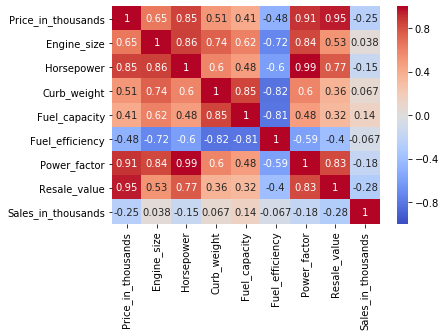

In [9]:
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, vmin=-1, vmax=1);

In [10]:
# drop features that show dependency on another feature. 

In [11]:
cols = ['Price_in_thousands', 'Engine_size', 'Horsepower','Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Latest_Launch', 'Resale_value','Sales_in_thousands', 'Manufacturer', 'Model','Vehicle_type',]
df = df[cols]

In [12]:
#sns.pairplot(df, height=1.2, aspect=1.5, hue='Manufacturer');

## OLS with Statsmodels - Patsies

In [14]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Price_in_thousands ~ Engine_size + Horsepower + Curb_weight + Fuel_capacity + Fuel_efficiency + Resale_value + Sales_in_thousands', data=df, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit1 = model.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Price_in_thousands   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     370.0
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           7.03e-73
Time:                        13:40:32   Log-Likelihood:                -287.78
No. Observations:                 117   AIC:                             591.6
Df Residuals:                     109   BIC:                             613.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -20.2677      5.551     -3.651      0.000     -31.269      -9.266
Engine_size           -0.0906      0.701     -0.129      0.897      -1.481       1.300
Horsepower             0.0479      0.014      3.419      0.001       0.020       0.076
Curb_weight            6.1587      1.049      5.870      0.000       4.079       8.238
Fuel_capacity         -0.3252      0.151     -2.149      0.034      -0.625      -0.025
Fuel_efficiency        0.2631      0.124      2.121      0.036       0.017       0.509
Resale_value           0.9373      0.042     22.274      0.000       0.854       1.021
Sales_in_thousands    -0.0018      0.004     -0.443      0.659      -0.010       0.006
==============================================================================
Omnibus:                       15.588   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.870
Skew:                           0.524   Prob(JB):                     1.98e-07
Kurtosis:                       5.288   Cond. No.                     4.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Price_in_thousands ~ Horsepower + Curb_weight + Fuel_capacity + Fuel_efficiency + Resale_value + Sales_in_thousands', data=df, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit2 = model.fit()

# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Price_in_thousands   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     435.6
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           3.25e-74
Time:                        13:40:35   Log-Likelihood:                -287.79
No. Observations:                 117   AIC:                             589.6
Df Residuals:                     110   BIC:                             608.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -20.3111      5.516     -3.682      0.000     -31.242      -9.380
Horsepower             0.0466      0.009      5.217      0.000       0.029       0.064
Curb_weight            6.1248      1.011      6.057      0.000       4.121       8.129
Fuel_capacity         -0.3242      0.150     -2.155      0.033      -0.622      -0.026
Fuel_efficiency        0.2666      0.120      2.215      0.029       0.028       0.505
Resale_value           0.9393      0.039     24.068      0.000       0.862       1.017
Sales_in_thousands    -0.0019      0.004     -0.481      0.631      -0.010       0.006
==============================================================================
Omnibus:                       15.309   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.188
Skew:                           0.514   Prob(JB):                     2.78e-07
Kurtosis:                       5.266   Cond. No.                     4.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Price_in_thousands ~ Horsepower + Curb_weight + Fuel_capacity + Fuel_efficiency + Resale_value', data=df, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit3 = model.fit()

# Print summary statistics of the model's performance
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Price_in_thousands   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     526.3
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           1.51e-75
Time:                        13:40:35   Log-Likelihood:                -287.91
No. Observations:                 117   AIC:                             587.8
Df Residuals:                     111   BIC:                             604.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -20.3996      5.493     -3.713      0.000     -31.285      -9.514
Horsepower          0.0465      0.009      5.228      0.000       0.029       0.064
Curb_weight         6.1483      1.007      6.108      0.000       4.154       8.143
Fuel_capacity      -0.3353      0.148     -2.263      0.026      -0.629      -0.042
Fuel_efficiency     0.2678      0.120      2.233      0.028       0.030       0.506
Resale_value        0.9438      0.038     25.013      0.000       0.869       1.019
==============================================================================
Omnibus:                       15.069   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.618
Skew:                           0.491   Prob(JB):                     2.25e-07
Kurtosis:                       5.306   Cond. No.                     3.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Price_in_thousands ~ (Horsepower + Fuel_capacity + Fuel_efficiency)+ (Curb_weight * Resale_value)', data=df, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit4 = model.fit()

# Print summary statistics of the model's performance
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Price_in_thousands   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     571.7
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           1.80e-80
Time:                        13:40:35   Log-Likelihood:                -272.45
No. Observations:                 117   AIC:                             558.9
Df Residuals:                     110   BIC:                             578.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.5096      6.257      0.401      0.689      -9.890      14.909
Horsepower                   0.0533      0.008      6.738      0.000       0.038       0.069
Fuel_capacity               -0.3271      0.130     -2.508      0.014      -0.586      -0.069
Fuel_efficiency              0.0509      0.112      0.454      0.651      -0.171       0.273
Curb_weight                  0.4834      1.322      0.366      0.715      -2.137       3.104
Resale_value                 0.0950      0.151      0.630      0.530      -0.204       0.394
Curb_weight:Resale_value     0.2414      0.042      5.769      0.000       0.158       0.324
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.019   Jarque-Bera (JB):               13.637
Skew:                           0.204   Prob(JB):                      0.00109
Kurtosis:                       4.622   Cond. No.                     5.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Residual_Plot')

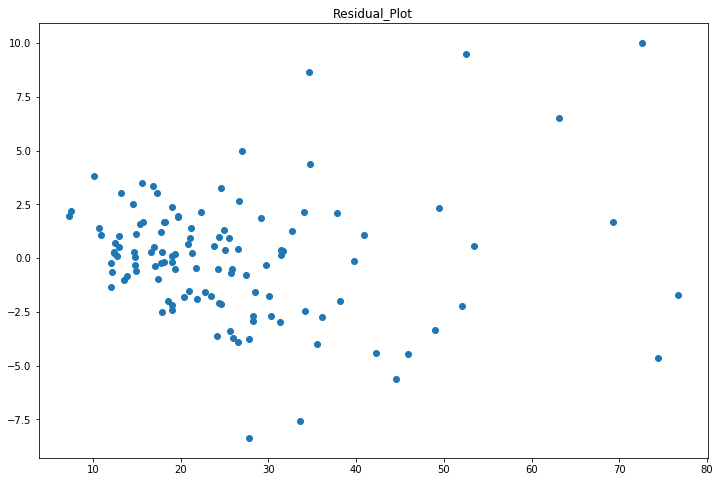

In [19]:
plt.figure(figsize=(12,8))
plt.scatter(fit3.predict(), fit3.resid);
plt.title('Residual_Plot')

## LR with sklearn

In [ ]:
cols = ['Price_in_thousands', 'Engine_size', 'Horsepower','Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Resale_value']
df = df[cols]
df.head()

In [ ]:

# Create an empty model
lr = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = df.iloc[:, 1:]

# Choose the response variable(s)
y = df.iloc[:, 0]

# Fit the model to the full dataset
lr.fit(X, y)

# Print out the R^2 for the model against the full dataset
lr.score(X,y)

In [ ]:
# STUDENT SECTION
# print out intercept
print(lr.intercept_)

# print out other coefficients
lr.coef_

# note how much more elegant statsmodel renders results; yet, sklearn's raw values are easier to capture

In [ ]:
# Pickle fit2 to a file
df.to_pickle('sales_continuous_data.pkl')
fit2.save('sales_continuous_sm_model.pkl')